In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

Consider the stochastic differential equation (SDE)
$$
dx_t = \sigma dW_t
$$
Here $W_t$ is a Wiener process: a continuous stochastic process whose increments $W_t - W_{t'}$ are normally distributed with mean zero and variance $t-t'.$ This represents the stochastic driving of the equation with $\sigma=\sqrt{2D}$. The system is said to be driven by a *multiplicative noise* if $D$ depends on the state of the system. The integration of the above differential equation is not uniquely defined in that case and care must taken in choosing the convention. The stochastic integral
$$
\int_0^T f(x)\circ_{\alpha} dW_t = \lim_{N\rightarrow \infty} \sum_{n=0}^{N-1}\Delta W_{t_n}
$$
Here $t_n = \frac{n+\alpha}{N}T$, where $\alpha=0,0.5,1$ typically. A correct convention should be chosen from the experimental data or from an another unambigous model. For example, for overdamped Langevin equation, the choice of $\alpha$ can be made by starting with underdamped Langevin equation and then adiabatically eliminating the fast degree of freedom.

Thus, the SDE can be written as
$$
dx_t = (\alpha-\alpha')\frac{d\sigma}{dt}dt + \sigma\circ_{\alpha'} dW_t
$$

Here the integration convention is given by $\alpha'$ and there is a noise-induced drift term.

Let us now consider the example of an unbiased random walker, and therefore, there is no multiplicative noise. The SDE is then simply
$$
x_{t+1} =x_{t} \pm \sigma \sqrt{\Delta t}
$$

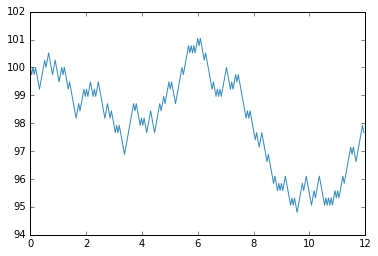

In [150]:
N  = 256;  
t0 = 0
tf = 12
dt = float(tf - t0) / N
ts = np.arange(t0, tf, dt)
ys = np.zeros(np.prod(ts.shape))
ss = 1

def sigma(t): 
    return ss

def simulate(ys, ys0, sqdt):
    ys[0] = ys0
    for i in range(N-1):
        ys[i+1] = ys[i] + (1-2*np.random.randint(0, 2))*sqdt
    
ys0   = 100
sqdt  = 1.2*np.sqrt(dt)
simulate(ys, ys0, sqdt)
plt.plot(ts, ys, color="#348ABD");

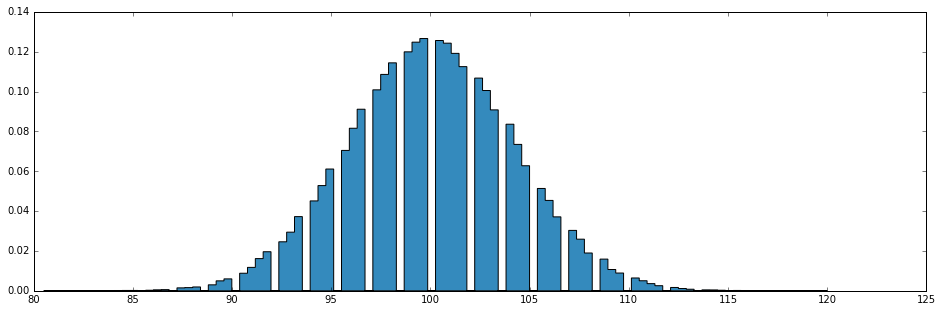

In [152]:
fig = plt.figure(figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k'); 

Ns = 100000
R = np.zeros(Ns)
for i in range(Ns):
    simulate(ys, ys0, sqdt)
    R[i] = ys[N-1]
    
plt.hist(R, bins=100, normed=1, histtype='stepfilled', color="#348ABD");

## A colloid near a plane wall
In this case the mobility of a colloid is a function of the distance of the colloid from the wall and thus a suitable choice is needed. We use the choice which correspond to adiabtic elimination of the momentum from the full Langevin equation and include the effective drift term.

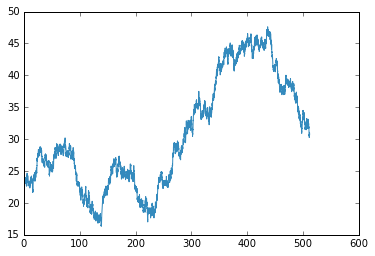

In [153]:
t0 = 0
tf = 512
N  = 10000  
dt    = float(tf - t0) / N

eta = 1.0/6   # viscosity
a   = 1       # radius


def muPerp(h): 
    """mobility of a colloid at a height h from a plane wall (perpendicular to wall)"""
    return  ( 1 - (9.0/8)*(a/h) + 0.5*(a/h)**3) / (6*3.14*eta*a)

def driftMuPerp(h): 
    """mobility of a colloid at a height h from a plane wall (perpendicular to wall)"""
    return  ( (9.0/8)*(a/h**2) - 1.5*(a**3/h**4))/(6*3.14*eta*a)


def muPar(h): 
    """mobility of a colloid at a height h from a plane wall (parallel to wall)"""
    return  ( 1 - (9.0/16)*(a/h) + (a/(2*h))**3)/(6*3.14*eta*a)


def sigma(mu, t): 
    c_sigma = np.sqrt(2*mu)
    return c_sigma
    
    
def dW(dt): 
    """dW_{n}=W_{n+1} -W_{n}."""
    return np.random.normal(loc=0.0, scale=np.sqrt(dt))

def wallWCA(h): 
    F=0
    if h<=1.1:
        F = 1*1/(h**12)
    return F
            
    return np.random.normal(loc=0.0, scale=np.sqrt(dt))



def simulate(ts, ys):
    for i in range(1, ts.size):
        h = ys[i-1]
        ys[i] = h  + (muPerp(h)*wallWCA(h) + driftMuPerp(h))*dt + sigma(muPerp(h), ts[i])*dW(dt)
        #ys[i] = ys[i-1]  + sigma(muPar(h), ts[i])*dW(dt)

        
#declare and initialize
ts    = np.arange(t0, tf, dt)
ys    = np.zeros(np.prod(ts.shape))
ys[0] = 25    # height of the colloid from the wall

#simulate and plot
simulate(ts, ys)
plt.plot(ts, ys, color="#348ABD");

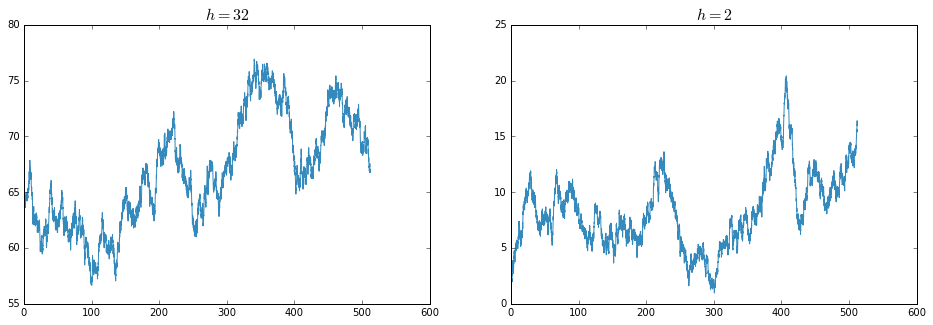

In [155]:
fig = plt.figure(figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k'); 

ys[0] = 64        # height of the colloid from the wall
simulate(ts, ys)
sp =  fig.add_subplot(1, 2, 1 ); 
plt.plot(ts, ys, color="#348ABD"); 
plt.title('$h=32$', fontsize=16);  

 

ys[0] = 2    # height of the colloid from the wall
simulate(ts, ys)
sp =  fig.add_subplot(1, 2, 2);  
plt.plot(ts, ys, color="#348ABD");  
plt.title('$h=2$', fontsize=16);  

## Ornstein-Uhlenbeck Process

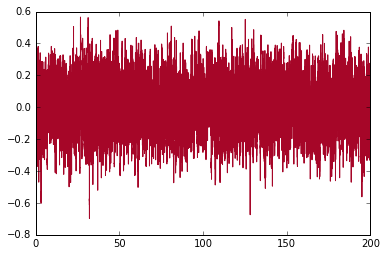

In [170]:
import numpy as np
import matplotlib.pyplot as plt


t0 = 0
tf = 200
N  = 1000000  
dt    = float(tf - t0) / N

eta = 1.0/6   # viscosity
a   = 1       # radius
k   = 0.01    # stiffness of the trap in plane
mu  = 1/(6*np.pi*eta*a) 

def sigma(mu, t): 
    c_sigma = np.sqrt(2*mu)
    return c_sigma
    
    
def dW(dt): 
    """dW_{n}=W_{n+1} -W_{n}."""
    return np.random.normal(loc=0.0, scale=np.sqrt(dt))


def simulate(ts, ys, h):
    for i in range(1, ts.size):
        ys[i] = ys[i-1] - k*mu*ys[i-1] + sigma(mu, ts[i])*dW(dt)

        
#declare and initialize
ts    = np.arange(t0, tf, dt)
ys    = np.zeros(np.prod(ts.shape))
ys[0] = 0
z = 25    # height of the colloid from the wall

#simulate and plot
simulate(ts, ys, z)
plt.plot(ts, ys, color="#A60628");

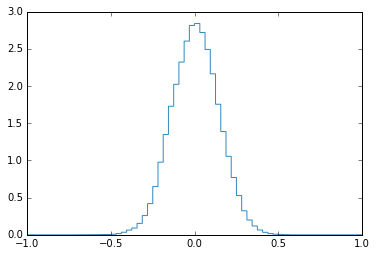

In [171]:
plt.hist(ys, bins=64, range=(-1, 1), normed=1, histtype='step', color="#348ABD");